In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('GlobalTemperatures.csv')

In [48]:
data.loc[:25]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dates = data['dt']

In [17]:
dates.loc[0]

'1750-01-01'

In [18]:
def date_transform(date):
    date = date.split('-')
    return int(date[0])*100+int(date[1])

In [19]:
dates = dates.apply(date_transform)

In [34]:
x = dates[:12]
y = data['LandAverageTemperature'][:12]
error =  data['LandAverageTemperatureUncertainty'][:12]
plt.rcParams['figure.figsize'] = [15, 5]

Text(0,0.5,'Temperature in degree C')

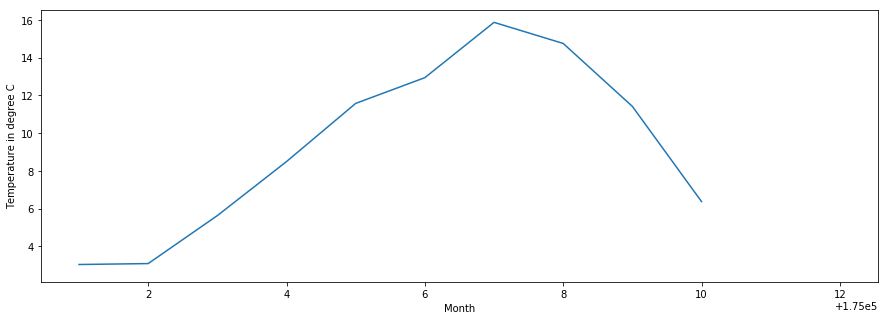

In [41]:
plt.plot(x, y, label='both limits (default)')
plt.xlabel('Month')
plt.ylabel('Temperature in degree C')

## Plotting year-wise variation from 1750 - 2015 on a month scale

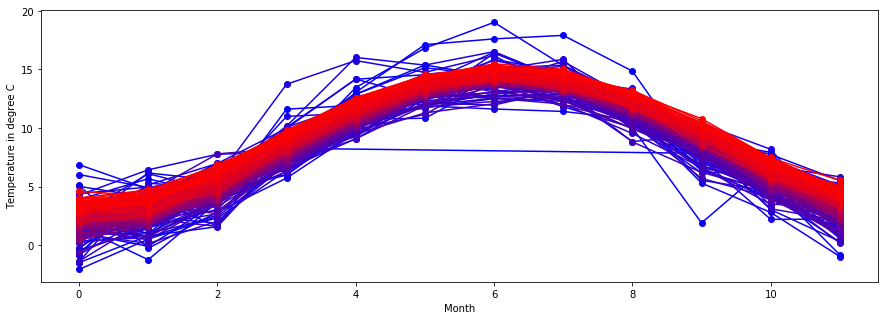

In [97]:
x = np.arange(0,12)
for i in range(266):
    y = np.array(data['LandAverageTemperature'][i*12:(i+1)*12])
    nanmask = np.isfinite(y)
    #error =  data['LandAverageTemperatureUncertainty'][i*12:(i+1)*12]
    color = (0.0+ i/266, 0.0 ,1 - i/266)
    plt.plot(x[nanmask], y[nanmask], color = color ,linestyle='-', marker='o')

    plt.xlabel('Month')
    plt.ylabel('Temperature in degree C')
    
    